Consistency Score (Bowler) = w1 * (Inns / Mat) + w2 * (Overs / Inns) + w3 * (Wkts / Overs) - w4 * (Ave) - w5 * (Econ) - w6 * (SR / 100) + w7 * ((4W + 1.25 * 5W) / Inns) + W8*(Mdns/Overs) 

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def analyze_and_visualize(df):
    # Select Features for Analysis
    features = ['Mat', 'Inns', 'Overs', 'Mdns', 'Runs', 
                'Wkts', 'Ave', 'Econ', 'SR', '4W', '5W']
    df_analysis = df[features]
    
    # Replace infinities and NaN with 0
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)
    
    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    
    # Visualize Correlation Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Features')
    plt.show()
    
    return df_analysis

In [4]:
def calculate_bowler_formula_components(df):
    """
    Calculates the components of the Bowler Consistency Score formula.
    """
    df_components = df.copy()

    # Ensure numeric types for calculations (handle potential NaN from coercion)
    df_components['Inns'] = pd.to_numeric(df_components['Inns'], errors='coerce')
    df_components['Mat'] = pd.to_numeric(df_components['Mat'], errors='coerce')
    df_components['Overs'] = pd.to_numeric(df_components['Overs'], errors='coerce')
    df_components['Wkts'] = pd.to_numeric(df_components['Wkts'], errors='coerce')
    df_components['Ave'] = pd.to_numeric(df_components['Ave'], errors='coerce')
    df_components['Econ'] = pd.to_numeric(df_components['Econ'], errors='coerce')
    df_components['SR'] = pd.to_numeric(df_components['SR'], errors='coerce')
    df_components['4W'] = pd.to_numeric(df_components['4W'], errors='coerce')
    df_components['5W'] = pd.to_numeric(df_components['5W'], errors='coerce')
    df_components['Mdns'] = pd.to_numeric(df_components['Mdns'], errors='coerce')

    # Perform calculations, ensure float division and handle potential NaN values
    df_components['Inns_per_Mat'] = df_components['Inns'].astype(float) / df_components['Mat'].astype(float) # Ensure float division
    df_components['Overs_per_Inns'] = df_components['Overs'].astype(float) / df_components['Inns'].astype(float)
    df_components['Wkts_per_Overs'] = df_components['Wkts'].astype(float) / df_components['Overs'].astype(float)
    df_components['Ave_Score'] = df_components['Ave'].astype(float)  # Direct Ave
    df_components['Econ_Rate'] = df_components['Econ'].astype(float)  # Direct Econ
    df_components['SR_per_100'] = df_components['SR'].astype(float) / 100
    df_components['4W5W_per_Inns'] = (df_components['4W'].astype(float) + 1.25 *  df_components['5W'].astype(float)) / df_components['Inns'].astype(float)
    df_components['Mdns_per_Overs'] = df_components['Mdns'].astype(float) / df_components['Overs'].astype(float)

    return df_components

In [5]:
data = pd.read_excel("../../all season cleaned data/bowlerset_ipl.xlsx")
df = data.copy()
print("Data types of your columns before calculation:")


Data types of your columns before calculation:


In [6]:
numeric_cols = ['Inns', 'Mat', 'Overs', 'Mdns', 'Runs', 'Wkts', 'Ave', 'Econ', 'SR', '4W', '5W', 'Mdns'] # Added Mdns
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Use df here

# Verify data types AFTER explicit conversion
print("\nData types of your columns AFTER explicit numeric conversion:")
print(df.dtypes) # Use df here

# --- Correctly Remove Rows with NaN Values ---
cols_to_check_nan = ['Inns', 'Mat', 'Overs', 'Wkts', 'Ave', 'Econ', 'SR', '4W', '5W', 'Mdns'] # Added Mdns if relevant, keep consistent
print("\nNumber of NaN values BEFORE removing:")
print(df[cols_to_check_nan].isna().sum()) # Check NaN counts in relevant columns before removal

df_cleaned = df.dropna(subset=cols_to_check_nan, how='any') # Use how='any' to drop row if ANY of these cols is NaN
print("\nNumber of rows BEFORE removing NaNs:", len(df))
print("Number of rows AFTER removing NaNs:", len(df_cleaned)) # Print length of df_cleaned


# Calculate bowler formula components using the CLEANED data (df_cleaned)
calculations_with_data = calculate_bowler_formula_components(df_cleaned) # Pass df_cleaned

# Select the component columns for correlation analysis
component_columns = [
    'Inns_per_Mat',
    'Overs_per_Inns',
    'Wkts_per_Overs',
    'Ave_Score',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Inns',
    'Mdns_per_Overs'  
]

# Calculate the correlation matrix for the components
correlation_matrix = calculations_with_data[component_columns].corr() # Use calculations_with_data

# Display the correlation matrix
print("\nCorrelation Matrix of Bowler Consistency Formula Components (after NaN removal):")
print(correlation_matrix)


Data types of your columns AFTER explicit numeric conversion:
Player     object
Span       object
Mat         int64
Inns        int64
Overs     float64
Mdns        int64
Runs        int64
Wkts        int64
Ave       float64
Econ      float64
SR        float64
4W          int64
5W          int64
Type       object
dtype: object

Number of NaN values BEFORE removing:
Inns     0
Mat      0
Overs    0
Wkts     0
Ave      6
Econ     0
SR       6
4W       0
5W       0
Mdns     0
dtype: int64

Number of rows BEFORE removing NaNs: 123
Number of rows AFTER removing NaNs: 117

Correlation Matrix of Bowler Consistency Formula Components (after NaN removal):
                Inns_per_Mat  Overs_per_Inns  Wkts_per_Overs  Ave_Score  \
Inns_per_Mat        1.000000        0.497765       -0.272575   0.147518   
Overs_per_Inns      0.497765        1.000000        0.080605  -0.220771   
Wkts_per_Overs     -0.272575        0.080605        1.000000  -0.807409   
Ave_Score           0.147518       -0.220771 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_bowler_consistency_components(df_components):
    features = [
        'Inns_per_Mat',
        'Overs_per_Inns',
        'Wkts_per_Overs',
        'Ave_Score',
        'Econ_Rate',
        'SR_per_100',
        '4W5W_per_Inns',
        'Mdns_per_Overs'
    ]
    df_analysis = df_components[features].copy() # Use .copy() to avoid SettingWithCopyWarning

    # Replace infinities and NaN with 0 - Handle potential issues from calculations
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)

    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5) # Added fmt and linewidths for better readability
    plt.title('Correlation Matrix of Bowler Consistency Formula Components')
    plt.show()

    return df_analysis




                Inns_per_Mat  Overs_per_Inns  Wkts_per_Overs  Ave_Score  \
Inns_per_Mat        1.000000        0.497765       -0.272575   0.147518   
Overs_per_Inns      0.497765        1.000000        0.080605  -0.220771   
Wkts_per_Overs     -0.272575        0.080605        1.000000  -0.807409   
Ave_Score           0.147518       -0.220771       -0.807409   1.000000   
Econ_Rate           0.072612       -0.238702       -0.292847   0.629760   
SR_per_100          0.159699       -0.141834       -0.870330   0.911037   
4W5W_per_Inns       0.043528        0.207640        0.497575  -0.347815   
Mdns_per_Overs      0.065056        0.295008        0.195554  -0.223306   

                Econ_Rate  SR_per_100  4W5W_per_Inns  Mdns_per_Overs  
Inns_per_Mat     0.072612    0.159699       0.043528        0.065056  
Overs_per_Inns  -0.238702   -0.141834       0.207640        0.295008  
Wkts_per_Overs  -0.292847   -0.870330       0.497575        0.195554  
Ave_Score        0.629760    0.911037   

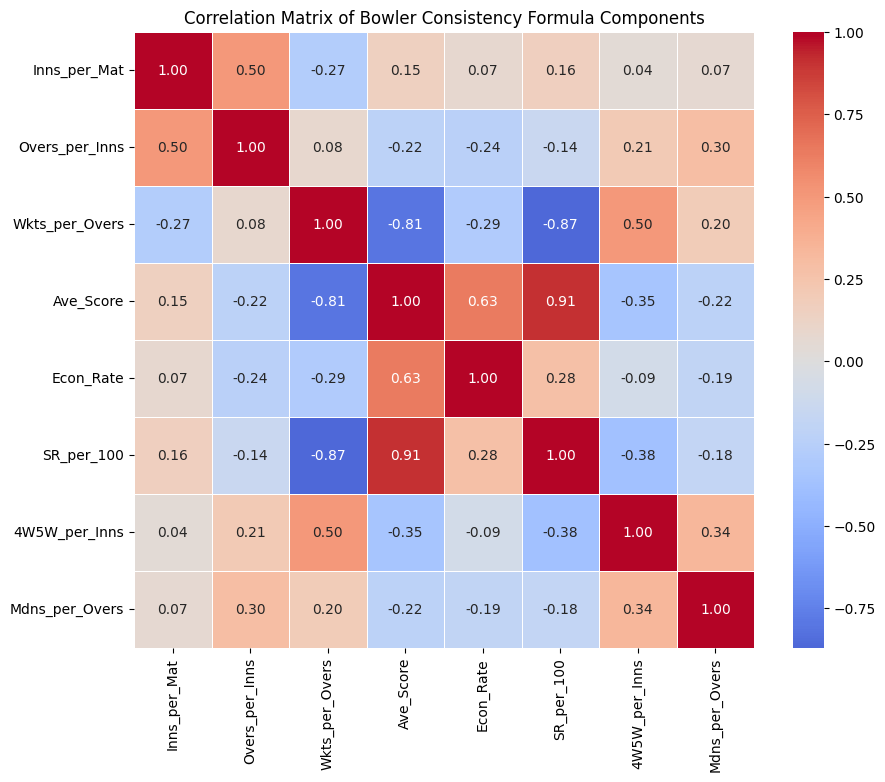

In [8]:
analyzed_df = analyze_bowler_consistency_components(calculations_with_data)


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

# Assuming calculations_with_data is your DataFrame after computing the derived metrics,
# and that it includes the following component columns:
features = [
    'Inns_per_Mat', 
    'Overs_per_Inns', 
    'Wkts_per_Overs', 
    'Ave_Score', 
    'Econ_Rate', 
    'SR_per_100', 
    '4W5W_per_Inns',
    'Mdns_per_Overs'
]

#########################################
# 1. Principal Component Analysis (PCA)
#########################################

# Prepare the data: fill any NaN and standardize the features
df_pca = calculations_with_data[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
print("PCA Loadings (each column is a principal component):")
print(loadings)

# You can use the loadings for PC1 (which explains most variance) as guidance for the weights:
pc1_loadings = loadings['PC1']
# Normalize the PC1 loadings (absolute values) to sum to 1:
pca_weights = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()).sort_values(ascending=False)
print("\nSuggested Weights from PCA (based on PC1 loadings):")
print(pca_weights)

#########################################
# 2. Analytic Hierarchy Process (AHP)
#########################################

# For AHP, you typically have expert input in the form of a pairwise comparison matrix.
# Here’s an example pairwise comparison matrix for the 7 criteria. 
# (You should adjust these values based on domain expertise.)
pairwise_matrix = np.array([
    [1,     2,     3,     4,     5,     6,     7,    8],
    [1/2,   1,     2,     3,     4,     5,     6,    7],
    [1/3,   1/2,   1,     2,     3,     4,     5,    6],
    [1/4,   1/3,   1/2,   1,     2,     3,     4,    5],
    [1/5,   1/4,   1/3,   1/2,   1,     2,     3,    4],
    [1/6,   1/5,   1/4,   1/3,   1/2,   1,     2,    3],
    [1/7,   1/6,   1/5,   1/4,   1/3,   1/2,   1,    2],
    [1/8,   1/7,   1/6,   1/5,   1/4,   1/3,   1/2,  1]
])

# Calculate the principal eigenvector of the pairwise matrix
eigvals, eigvecs = np.linalg.eig(pairwise_matrix)
max_eigval_index = np.argmax(eigvals.real)
ahp_weights = eigvecs[:, max_eigval_index].real
# Normalize to sum to 1
ahp_weights = ahp_weights / ahp_weights.sum()

# Create a Series with these weights for clarity
ahp_weights_series = pd.Series(ahp_weights, index=features)
print("\nWeights from AHP based on expert pairwise comparisons:")
print(ahp_weights_series)

#########################################
# 3. Optimization-Based Approach
#########################################

# Define a function to calculate the composite consistency score given a set of weights.
def consistency_score(weights, df):
    # weights: array of shape (7,)
    # df: DataFrame containing the metrics in the order of 'features'
    return np.dot(df[features].values, weights)

# Define an objective function.
# In this example, we aim to maximize the variance of the consistency score.
# (Maximizing variance might help differentiate between players.)
def objective(weights, df):
    scores = consistency_score(weights, df)
    # We minimize the negative variance.
    return -np.var(scores)

# Set initial weights (equal distribution)
initial_weights = np.ones(len(features)) / len(features)
# Define bounds if needed (here we constrain weights between 0 and 1)
bounds = [(0, 1)] * len(features)

# Run the optimization
result = opt.minimize(objective, initial_weights, args=(df_pca,), bounds=bounds)
optimized_weights = result.x / result.x.sum()  # Normalize to sum to 1

# Display the optimized weights
optimized_weights_series = pd.Series(optimized_weights, index=features)
print("\nOptimized Weights from the Objective Function (maximizing variance):")
print(optimized_weights_series)


PCA Loadings (each column is a principal component):
                     PC1       PC2       PC3       PC4       PC5       PC6  \
Inns_per_Mat    0.084854  0.632450 -0.052639 -0.418867 -0.019112 -0.626585   
Overs_per_Inns -0.158112  0.629827 -0.164838 -0.138720 -0.101186  0.722216   
Wkts_per_Overs -0.485810 -0.184444  0.155729 -0.183319 -0.090025  0.050843   
Ave_Score       0.514594  0.068476  0.239874  0.088417  0.075014  0.135178   
Econ_Rate       0.298698 -0.072982  0.661420 -0.373016 -0.449138  0.145588   
SR_per_100      0.488925  0.133904 -0.039717  0.294005  0.333825  0.091495   
4W5W_per_Inns  -0.307447  0.169164  0.597571 -0.003117  0.696765  0.016601   
Mdns_per_Overs -0.210217  0.335772  0.303514  0.733686 -0.420736 -0.187333   

                     PC7       PC8  
Inns_per_Mat    0.146992 -0.002315  
Overs_per_Inns -0.007453  0.003546  
Wkts_per_Overs  0.811628 -0.051796  
Ave_Score       0.343537  0.723346  
Econ_Rate      -0.127016 -0.299637  
SR_per_100      0.3888

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt

# Assuming calculations_with_data is your DataFrame after computing the derived metrics,
# and that it includes the following component columns corresponding to:
# Inns_per_Mat, Overs_per_Inns, Wkts_per_Overs, Ave_Score, Econ_Rate, SR_per_100, 4W5W_per_Inns, Mdns_per_Overs
features = [
    'Inns_per_Mat', 
    'Overs_per_Inns', 
    'Wkts_per_Overs', 
    'Ave_Score',    # This will be subtracted
    'Econ_Rate',    # This will be subtracted
    'SR_per_100',   # This will be subtracted
    '4W5W_per_Inns',
    'Mdns_per_Overs'
]

#########################################
# 1. Principal Component Analysis (PCA)
#########################################

# Prepare the data: fill any NaN and standardize the features
df_pca = calculations_with_data[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
print("PCA Loadings (each column is a principal component):")
print(loadings)

# Use the loadings for PC1 (which explains most variance) as guidance for the weights:
pc1_loadings = loadings['PC1']
# Normalize the PC1 loadings (absolute values) to sum to 1:
pca_weights = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()).sort_values(ascending=False)
print("\nSuggested Weights from PCA (based on PC1 loadings):")
print(pca_weights)

#########################################
# 2. Analytic Hierarchy Process (AHP)
#########################################

# For AHP, you typically have expert input in the form of a pairwise comparison matrix.
# Here’s an example pairwise comparison matrix for the 8 criteria.
pairwise_matrix = np.array([
    [1,     2,     3,     4,     5,     6,     7,    8],
    [1/2,   1,     2,     3,     4,     5,     6,    7],
    [1/3,   1/2,   1,     2,     3,     4,     5,    6],
    [1/4,   1/3,   1/2,   1,     2,     3,     4,    5],
    [1/5,   1/4,   1/3,   1/2,   1,     2,     3,    4],
    [1/6,   1/5,   1/4,   1/3,   1/2,   1,     2,    3],
    [1/7,   1/6,   1/5,   1/4,   1/3,   1/2,   1,    2],
    [1/8,   1/7,   1/6,   1/5,   1/4,   1/3,   1/2,  1]
])

# Calculate the principal eigenvector of the pairwise matrix
eigvals, eigvecs = np.linalg.eig(pairwise_matrix)
max_eigval_index = np.argmax(eigvals.real)
ahp_weights = eigvecs[:, max_eigval_index].real
# Normalize to sum to 1
ahp_weights = ahp_weights / ahp_weights.sum()

# Create a Series with these weights for clarity
ahp_weights_series = pd.Series(ahp_weights, index=features)
print("\nWeights from AHP based on expert pairwise comparisons:")
print(ahp_weights_series)

#########################################
# 3. Optimization-Based Approach
#########################################

# Define a function to calculate the composite consistency score given a set of weights.
def consistency_score(weights, df):
    # The sign_vector reflects that for Ave_Score, Econ_Rate, and SR_per_100,
    # lower values are better (thus we subtract these metrics).
    # For other features, higher values are better.
    sign_vector = np.array([1, 1, 1, -1, -1, -1, 1, 1])
    # Multiply the weights with the sign vector to account for negative contributions
    adjusted_weights = weights * sign_vector
    return np.dot(df[features].values, adjusted_weights)

# Define an objective function.
# In this example, we aim to maximize the variance of the consistency score.
# (Maximizing variance might help differentiate between players.)
def objective(weights, df):
    scores = consistency_score(weights, df)
    # We minimize the negative variance.
    return -np.var(scores)

# Set initial weights (equal distribution)
initial_weights = np.ones(len(features)) / len(features)
# Define bounds if needed (here we constrain weights between 0 and 1)
bounds = [(0, 1)] * len(features)

# Run the optimization
result = opt.minimize(objective, initial_weights, args=(df_pca,), bounds=bounds)
optimized_weights = result.x / result.x.sum()  # Normalize to sum to 1

# Display the optimized weights
optimized_weights_series = pd.Series(optimized_weights, index=features)
print("\nOptimized Weights from the Objective Function (maximizing variance):")
print(optimized_weights_series)


PCA Loadings (each column is a principal component):
                     PC1       PC2       PC3       PC4       PC5       PC6  \
Inns_per_Mat    0.084854  0.632450 -0.052639 -0.418867 -0.019112 -0.626585   
Overs_per_Inns -0.158112  0.629827 -0.164838 -0.138720 -0.101186  0.722216   
Wkts_per_Overs -0.485810 -0.184444  0.155729 -0.183319 -0.090025  0.050843   
Ave_Score       0.514594  0.068476  0.239874  0.088417  0.075014  0.135178   
Econ_Rate       0.298698 -0.072982  0.661420 -0.373016 -0.449138  0.145588   
SR_per_100      0.488925  0.133904 -0.039717  0.294005  0.333825  0.091495   
4W5W_per_Inns  -0.307447  0.169164  0.597571 -0.003117  0.696765  0.016601   
Mdns_per_Overs -0.210217  0.335772  0.303514  0.733686 -0.420736 -0.187333   

                     PC7       PC8  
Inns_per_Mat    0.146992 -0.002315  
Overs_per_Inns -0.007453  0.003546  
Wkts_per_Overs  0.811628 -0.051796  
Ave_Score       0.343537  0.723346  
Econ_Rate      -0.127016 -0.299637  
SR_per_100      0.3888

In [13]:
import pandas as pd

# Full list of metrics
features = ['Inns_per_Mat', 'Overs_per_Inns', 'Wkts_per_Overs', 
            'Ave_Score', 'Econ_Rate', 'SR_per_100', '4W5W_per_Inns', 'Mdns_per_Overs']

# Original AHP weights from expert pairwise comparisons for all features (updated values)
ahp_weights_series = pd.Series({
    'Inns_per_Mat': 0.331325,
    'Overs_per_Inns': 0.230660,
    'Wkts_per_Overs': 0.157235,
    'Ave_Score': 0.105903,
    'Econ_Rate': 0.070936,
    'SR_per_100': 0.047681,
    '4W5W_per_Inns': 0.032698,
    'Mdns_per_Overs': 0.023562
})

# Original PCA weights derived from PC1 loadings for all features (updated values)
pca_weights = pd.Series({
    'Ave_Score': 0.201908,
    'SR_per_100': 0.191836,
    'Overs_per_Inns': 0.062037,
    'Econ_Rate': 0.117198,
    'Inns_per_Mat': 0.033294,
    '4W5W_per_Inns': 0.120631,
    'Wkts_per_Overs': 0.190614,
    'Mdns_per_Overs': 0.082482
})

# Normalize both weight sets so that they sum to 1 (if not already)
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Define a hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all features
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Now, define boost factors to increase the importance of the selected metrics.
# In this example, we give a boost factor of 2 to the important metrics and leave the others unchanged (factor of 1).
boost_factors = {
    'Inns_per_Mat': 1.0,
    'Overs_per_Inns': 1.0,
    'Wkts_per_Overs': 2.0,
    'Ave_Score': 2.0,
    'Econ_Rate': 2.0,
    'SR_per_100': 2.0,
    '4W5W_per_Inns': 1.0,
    'Mdns_per_Overs': 1.0
}

# Apply the boost factors to the hybrid weights
hybrid_weights_boosted = hybrid_weights.copy()
for metric in features:
    hybrid_weights_boosted[metric] *= boost_factors[metric]

# Normalize again so the boosted weights sum to 1
hybrid_weights_boosted = hybrid_weights_boosted / hybrid_weights_boosted.sum()

print("Hybrid Weights with Emphasis on Selected Metrics:")
print(hybrid_weights_boosted)


Hybrid Weights with Emphasis on Selected Metrics:
4W5W_per_Inns     0.039980
Ave_Score         0.182317
Econ_Rate         0.114793
Inns_per_Mat      0.163711
Mdns_per_Overs    0.027907
Overs_per_Inns    0.121861
SR_per_100        0.123067
Wkts_per_Overs    0.226364
dtype: float64


In [11]:
import pandas as pd

# Full list of metrics
features = ['Inns_per_Mat', 'Overs_per_Inns', 'Wkts_per_Overs', 
            'Ave_Score', 'Econ_Rate', 'SR_per_100', '4W5W_per_Inns', 'Mdns_per_Overs']

# Original AHP weights from expert pairwise comparisons for all features (updated values)
ahp_weights_series = pd.Series({
    'Inns_per_Mat': 0.331325,
    'Overs_per_Inns': 0.230660,
    'Wkts_per_Overs': 0.157235,
    'Ave_Score': 0.105903,
    'Econ_Rate': 0.070936,
    'SR_per_100': 0.047681,
    '4W5W_per_Inns': 0.032698,
    'Mdns_per_Overs': 0.023562
})

# Original PCA weights derived from PC1 loadings for all features (updated values)
pca_weights = pd.Series({
    'Ave_Score': 0.201908,
    'SR_per_100': 0.191836,
    'Overs_per_Inns': 0.062037,
    'Econ_Rate': 0.117198,
    'Inns_per_Mat': 0.033294,
    '4W5W_per_Inns': 0.120631,
    'Wkts_per_Overs': 0.190614,
    'Mdns_per_Overs': 0.082482
})

# Normalize both weight sets so that they sum to 1 (if not already)
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Define a hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all features
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Now, define boost factors to increase the importance of the selected metrics.
# In this example, we give a boost factor of 2 to the important metrics and leave the others unchanged (factor of 1).
boost_factors = {
    'Inns_per_Mat': 1.0,
    'Overs_per_Inns': 1.0,
    'Wkts_per_Overs': 2.0,
    'Ave_Score': 2.0,
    'Econ_Rate': 2.0,
    'SR_per_100': 2.0,
    '4W5W_per_Inns': 1.0,
    'Mdns_per_Overs': 1.0
}

# Apply the boost factors to the hybrid weights
hybrid_weights_boosted = hybrid_weights.copy()
for metric in features:
    hybrid_weights_boosted[metric] *= boost_factors[metric]

# Normalize again so the boosted weights sum to 1
hybrid_weights_boosted = hybrid_weights_boosted / hybrid_weights_boosted.sum()

print("Hybrid Weights with Emphasis on Selected Metrics:")
print(hybrid_weights_boosted)


Hybrid Weights with Emphasis on Selected Metrics:
4W5W_per_Inns     0.039980
Ave_Score         0.182317
Econ_Rate         0.114793
Inns_per_Mat      0.163711
Mdns_per_Overs    0.027907
Overs_per_Inns    0.121861
SR_per_100        0.123067
Wkts_per_Overs    0.226364
dtype: float64


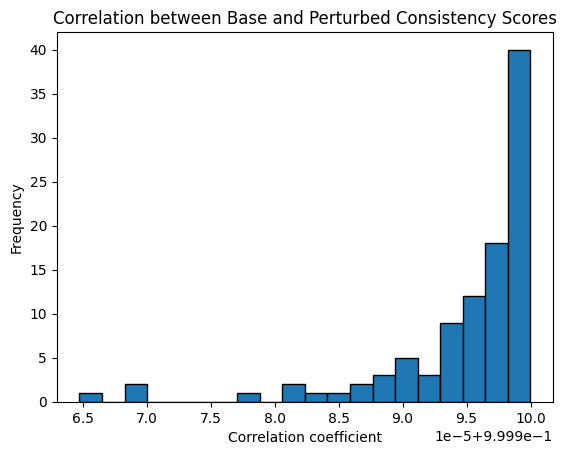

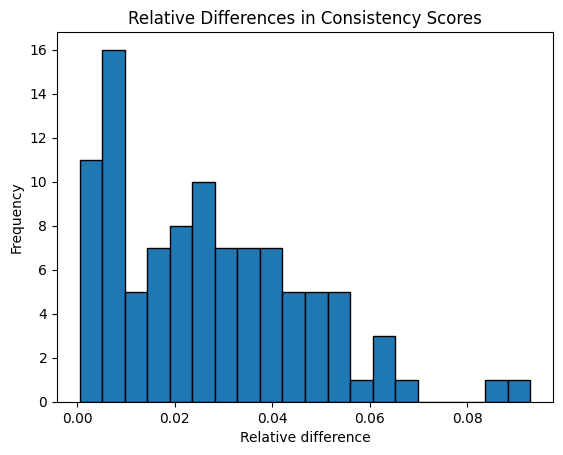

Mean correlation: 0.9999949384411679
Mean relative difference: 0.027440358867695466


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'calculations_with_data' is your DataFrame containing the derived metrics
# and 'hybrid_weights_boosted' is your final weight Series with the index corresponding to:
features = ['Inns_per_Mat', 'Overs_per_Mat', 'Wkts_per_Overs', 
            'Ave_Score', 'Econ_Rate', 'SR_per_100', '4W5W_per_Mat', 'Mdns_per_Overs']

# Define a function to compute the composite consistency score
def compute_consistency_score(df, weights):
    # Make sure the DataFrame columns are in the same order as weights.index
    return np.dot(df[weights.index].values, weights.values)

# Compute the base consistency scores with your nominal weights
base_scores = compute_consistency_score(calculations_with_data, hybrid_weights_boosted)

# Set up sensitivity analysis parameters
n_iterations = 100  # Number of perturbation iterations
perturbation_factor = 0.05  # 5% noise
perturbed_scores_list = []

# Generate perturbed weights and compute the corresponding consistency scores
for i in range(n_iterations):
    # Create random noise: normally distributed noise with 0 mean and 5% standard deviation
    noise = np.random.normal(loc=0, scale=perturbation_factor, size=len(hybrid_weights_boosted))
    
    # Apply the noise multiplicatively to each weight
    perturbed_weights = hybrid_weights_boosted * (1 + noise)
    
    # Renormalize to ensure the weights sum to 1
    perturbed_weights = perturbed_weights / perturbed_weights.sum()
    
    # Compute consistency score with perturbed weights
    perturbed_scores = compute_consistency_score(calculations_with_data, perturbed_weights)
    perturbed_scores_list.append(perturbed_scores)

# For each perturbed set, compute the correlation with the base scores
correlations = [np.corrcoef(base_scores, scores)[0, 1] for scores in perturbed_scores_list]

# Also compute the mean relative difference between perturbed scores and base scores
relative_differences = [
    np.mean(np.abs(scores - base_scores)) / np.mean(np.abs(base_scores))
    for scores in perturbed_scores_list
]

# Plot the distribution of correlation coefficients
plt.hist(correlations, bins=20, edgecolor='k')
plt.title("Correlation between Base and Perturbed Consistency Scores")
plt.xlabel("Correlation coefficient")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of relative differences
plt.hist(relative_differences, bins=20, edgecolor='k')
plt.title("Relative Differences in Consistency Scores")
plt.xlabel("Relative difference")
plt.ylabel("Frequency")
plt.show()

# Print summary statistics
print("Mean correlation:", np.mean(correlations))
print("Mean relative difference:", np.mean(relative_differences))


# FINAL CONSISTENCY SCORE CALCULATION
### Consistency Score (Bowler) = 0.163711 × (Inns / Mat) + 0.121861 × (Overs / Inns) + 0.226364 × (Wkts / Overs) + 0.182317 × Ave + 0.114793 × Econ + 0.123067 × (SR / 100) + 0.039980 × ((4W + 1.25*5W) / Inns) + 0.027907 × (Mdns / Overs)

In [25]:
import pandas as pd
import numpy as np

# Full list of metrics
features = ['Inns_per_Mat', 'Overs_per_Inns', 'Wkts_per_Overs', 
            'Ave_Score', 'Econ_Rate', 'SR_per_100', '4W5W_per_Inns', 'Mdns_per_Overs']

# Example: Assume calculations_with_data already exists with player metrics and a "Player_Name" column.
# calculations_with_data = pd.read_csv('your_data.csv')

# Original AHP weights from expert pairwise comparisons for all features (updated values)
ahp_weights_series = pd.Series({
    'Inns_per_Mat': 0.331325,
    'Overs_per_Inns': 0.230660,
    'Wkts_per_Overs': 0.157235,
    'Ave_Score': 0.105903,
    'Econ_Rate': 0.070936,
    'SR_per_100': 0.047681,
    '4W5W_per_Inns': 0.032698,
    'Mdns_per_Overs': 0.023562
})

# Original PCA weights derived from PC1 loadings for all features (updated values)
pca_weights = pd.Series({
    'Ave_Score': 0.201908,
    'SR_per_100': 0.191836,
    'Overs_per_Inns': 0.062037,
    'Econ_Rate': 0.117198,
    'Inns_per_Mat': 0.033294,
    '4W5W_per_Inns': 0.120631,
    'Wkts_per_Overs': 0.190614,
    'Mdns_per_Overs': 0.082482
})

# Normalize both weight sets so that they sum to 1 (if not already)
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Define a hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all features
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Define boost factors to increase the importance of selected metrics.
# For example, we give a boost factor of 2 to some metrics and leave others unchanged.
boost_factors = {
    'Inns_per_Mat': 1.0,
    'Overs_per_Inns': 1.0,
    'Wkts_per_Overs': 2.0,
    'Ave_Score': 2.0,
    'Econ_Rate': 2.0,
    'SR_per_100': 2.0,
    '4W5W_per_Inns': 1.0,
    'Mdns_per_Overs': 1.0
}

# Apply the boost factors to the hybrid weights
hybrid_weights_boosted = hybrid_weights.copy()
for metric in features:
    hybrid_weights_boosted[metric] *= boost_factors[metric]

# Normalize again so the boosted weights sum to 1
hybrid_weights_boosted = hybrid_weights_boosted / hybrid_weights_boosted.sum()

print("AHP Weights (Normalized):")
print(ahp_weights_norm)
print("\nPCA Weights (Normalized):")
print(pca_weights_norm)
print("\nHybrid Weights with Emphasis on Selected Metrics:")
print(hybrid_weights_boosted)

# ------------------------------------------------------------------
# Compute composite scores for each player using each weight set.
# ------------------------------------------------------------------

# IMPORTANT:
# If for some metrics (e.g., Ave_Score, Econ_Rate, SR_per_100) lower values are better,
# ensure that either your data or weights are adjusted accordingly. In this example, we assume
# that the scores are set up so that a higher composite score indicates better performance.

# Compute scores using AHP weights:
calculations_with_data['Score_AHP'] = calculations_with_data[features].dot(ahp_weights_norm)

# Compute scores using PCA weights:
calculations_with_data['Score_PCA'] = calculations_with_data[features].dot(pca_weights_norm)

# Compute scores using Hybrid (Boosted) weights:
calculations_with_data['Score_Hybrid'] = calculations_with_data[features].dot(hybrid_weights_boosted)

# Now, rank the players based on these scores (higher score means better ranking).
calculations_with_data['Rank_AHP'] = calculations_with_data['Score_AHP'].rank(ascending=False)
calculations_with_data['Rank_PCA'] = calculations_with_data['Score_PCA'].rank(ascending=False)
calculations_with_data['Rank_Hybrid'] = calculations_with_data['Score_Hybrid'].rank(ascending=False)

# Display the resulting DataFrame with player names, scores, and rankings (first 10 rows)
result = calculations_with_data[['Player', 
                                 'Score_AHP', 'Rank_AHP', 
                                 'Score_PCA', 'Rank_PCA', 
                                 'Score_Hybrid', 'Rank_Hybrid']].head(10)
print("\nPlayer Rankings (first 10 rows):")
print(result)
 # Define the bowling metrics subset:
bowling_features = ['Overs_per_Inns', 'Wkts_per_Overs', 
                    'Econ_Rate', '4W5W_per_Inns', 'Mdns_per_Overs']

# (Optionally) define corresponding weights for these metrics. For instance, you could extract the relevant parts:
ahp_bowling_weights = ahp_weights_norm[bowling_features]
pca_bowling_weights = pca_weights_norm[bowling_features]

# Compute a hybrid bowling weight (using the same alpha as before)
hybrid_bowling_weights = alpha * ahp_bowling_weights + (1 - alpha) * pca_bowling_weights

# (If you have boost factors for these bowling metrics, apply them similarly, then normalize.)

# Now compute composite scores using only bowling metrics:
calculations_with_data['Score_Bowling'] = calculations_with_data[bowling_features].dot(hybrid_bowling_weights)

# Rank the bowlers:
calculations_with_data['Rank_Bowling'] = calculations_with_data['Score_Bowling'].rank(ascending=False)

# (If your DataFrame includes non-bowlers, you might want to filter them out here using domain knowledge.)
print("\nBowler Rankings based on Bowling Metrics (first 10 rows):")
print(calculations_with_data[['Player', 'Score_Bowling', 'Rank_Bowling']].head(10))


AHP Weights (Normalized):
Inns_per_Mat      0.331325
Overs_per_Inns    0.230660
Wkts_per_Overs    0.157235
Ave_Score         0.105903
Econ_Rate         0.070936
SR_per_100        0.047681
4W5W_per_Inns     0.032698
Mdns_per_Overs    0.023562
dtype: float64

PCA Weights (Normalized):
Ave_Score         0.201908
SR_per_100        0.191836
Overs_per_Inns    0.062037
Econ_Rate         0.117198
Inns_per_Mat      0.033294
4W5W_per_Inns     0.120631
Wkts_per_Overs    0.190614
Mdns_per_Overs    0.082482
dtype: float64

Hybrid Weights with Emphasis on Selected Metrics:
4W5W_per_Inns     0.039980
Ave_Score         0.182317
Econ_Rate         0.114793
Inns_per_Mat      0.163711
Mdns_per_Overs    0.027907
Overs_per_Inns    0.121861
SR_per_100        0.123067
Wkts_per_Overs    0.226364
dtype: float64

Player Rankings (first 10 rows):
           Player  Score_AHP  Rank_AHP  Score_PCA  Rank_PCA  Score_Hybrid  \
0       SP Narine   4.443048      92.0   6.288773      93.0      6.126158   
1         B Kum

In [22]:
import pandas as pd
import numpy as np

# -----------------------------
# 1. Read Data from Excel (Bowlers)
# -----------------------------
# Replace with your actual file path.
file_path = '/Users/pavanbandaru/Downloads/cricket-squad-selection/all seasons/bowlerset_ipl.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Expected columns in the Excel file:
# 'Player', 'Mat', 'Inns', 'Overs', 'Wkts', 'Ave', 'Econ', 'SR', '4W', '5W', 'Mdns'

# -----------------------------
# 2. Data Cleaning
# -----------------------------
# Define the columns we need to ensure are numeric.
cols_to_convert = ['Mat', 'Inns', 'Overs', 'Wkts', 'Ave', 'Econ', 'SR', '4W', '5W', 'Mdns']

# Convert the listed columns to numeric; non-convertible values will become NaN.
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Optionally, print the data types to verify conversion.
print("Data Types after Conversion:")
print(df.dtypes)

# Fill NaN values that may have resulted from conversion or division errors.
# Here, we fill with 0 but you may choose a different strategy.
df.fillna(0, inplace=True)

# -----------------------------
# 3. Compute Derived Metrics for Bowlers
# -----------------------------
# Derived metrics:
# Inns_per_Mat = Inns / Mat
# Overs_per_Inns = Overs / Inns
# Wkts_per_Overs = Wkts / Overs
# 4W5W_per_Inns = (4W + 1.25 * 5W) / Inns
# Mdns_per_Overs = Mdns / Overs

# Use np.where to avoid division by zero if needed.
df['Inns_per_Mat'] = np.where(df['Mat'] != 0, df['Inns'] / df['Mat'], 0)
df['Overs_per_Inns'] = np.where(df['Inns'] != 0, df['Overs'] / df['Inns'], 0)
df['Wkts_per_Overs'] = np.where(df['Overs'] != 0, df['Wkts'] / df['Overs'], 0)
df['4W5W_per_Inns'] = np.where(df['Inns'] != 0, (df['4W'] + 1.25 * df['5W']) / df['Inns'], 0)
df['Mdns_per_Overs'] = np.where(df['Overs'] != 0, df['Mdns'] / df['Overs'], 0)

# -----------------------------
# 4. Define Weight Sets for Bowlers
# -----------------------------
# PCA-only weights for bowlers (example values; replace with your actual PCA-derived weights)
pca_weights = pd.Series({
    'Inns_per_Mat': 0.08,
    'Overs_per_Inns': 0.06,
    'Wkts_per_Overs': 0.25,
    'Ave': 0.22,            # lower is better -> subtracted
    'Econ': 0.18,           # lower is better -> subtracted
    'SR': 0.10,             # lower is better -> subtracted
    '4W5W_per_Inns': 0.12,
    'Mdns_per_Overs': 0.09
})
pca_weights /= pca_weights.sum()  # Normalize

# AHP-only weights for bowlers (example values; replace with your actual AHP-derived weights)
ahp_weights = pd.Series({
    'Inns_per_Mat': 0.30,
    'Overs_per_Inns': 0.20,
    'Wkts_per_Overs': 0.20,
    'Ave': 0.10,
    'Econ': 0.08,
    'SR': 0.05,
    '4W5W_per_Inns': 0.04,
    'Mdns_per_Overs': 0.03
})
ahp_weights /= ahp_weights.sum()  # Normalize

# Hybrid weights: combine AHP and PCA with a factor alpha (70% AHP, 30% PCA)
alpha = 0.7
hybrid_weights = alpha * ahp_weights + (1 - alpha) * pca_weights
hybrid_weights /= hybrid_weights.sum()  # Normalize

print("\nPCA Weights (Normalized):")
print(pca_weights)
print("\nAHP Weights (Normalized):")
print(ahp_weights)
print("\nHybrid Weights (Normalized):")
print(hybrid_weights)

# -----------------------------
# 5. Compute Consistency Score and Rank for Bowlers
# -----------------------------
def compute_bowler_scores_and_rank(df, weights, method_name):
    """
    Computes the consistency score for bowlers using:
      Score = (w1 * Inns_per_Mat) + (w2 * Overs_per_Inns) + (w3 * Wkts_per_Overs)
              - (w4 * Ave) - (w5 * Econ) - (w6 * SR)
              + (w7 * 4W5W_per_Inns) + (w8 * Mdns_per_Overs)
    and then ranks the players (rank 1 is best).
    """
    score_col = f'Consistency_Score_{method_name}'
    rank_col = f'Rank_{method_name}'
    
    df[score_col] = (
        weights['Inns_per_Mat'] * df['Inns_per_Mat'] +
        weights['Overs_per_Inns'] * df['Overs_per_Inns'] +
        weights['Wkts_per_Overs'] * df['Wkts_per_Overs'] -
        weights['Ave'] * df['Ave'] -
        weights['Econ'] * df['Econ'] -
        weights['SR'] * df['SR'] +
        weights['4W5W_per_Inns'] * df['4W5W_per_Inns'] +
        weights['Mdns_per_Overs'] * df['Mdns_per_Overs']
    )
    # Rank players: higher score gets a better rank (i.e., rank 1 is best)
    df[rank_col] = df[score_col].rank(ascending=False, method='min').astype(int)
    return df

# Compute scores and ranks for each method
df = compute_bowler_scores_and_rank(df, pca_weights, "PCA")
df = compute_bowler_scores_and_rank(df, ahp_weights, "AHP")
df = compute_bowler_scores_and_rank(df, hybrid_weights, "Hybrid")

# -----------------------------
# 6. Display Full Data with All Columns for Bowlers
# -----------------------------
cols_to_show = [
    'Player', 'Mat', 'Inns', 'Overs', 'Wkts', 'Ave', 'Econ', 'SR', '4W', '5W', 'Mdns',
    'Inns_per_Mat', 'Overs_per_Inns', 'Wkts_per_Overs', '4W5W_per_Inns', 'Mdns_per_Overs',
    'Consistency_Score_PCA', 'Rank_PCA',
    'Consistency_Score_AHP', 'Rank_AHP',
    'Consistency_Score_Hybrid', 'Rank_Hybrid'
]

# Sort by Hybrid rank as an example
df_full = df[cols_to_show].sort_values(by='Rank_Hybrid')

print("\nFull Data with Consistency Scores and Rankings for PCA-only, AHP-only, and Hybrid weights (Bowlers):")
print(df_full)

# Optionally, save the full output to an Excel file
df_full.to_excel('full_bowler_rankings.xlsx', index=False)


Data Types after Conversion:
Player     object
Span       object
Mat         int64
Inns      float64
Overs     float64
Mdns      float64
Runs       object
Wkts      float64
Ave       float64
Econ      float64
SR        float64
4W        float64
5W        float64
dtype: object

PCA Weights (Normalized):
Inns_per_Mat      0.072727
Overs_per_Inns    0.054545
Wkts_per_Overs    0.227273
Ave               0.200000
Econ              0.163636
SR                0.090909
4W5W_per_Inns     0.109091
Mdns_per_Overs    0.081818
dtype: float64

AHP Weights (Normalized):
Inns_per_Mat      0.30
Overs_per_Inns    0.20
Wkts_per_Overs    0.20
Ave               0.10
Econ              0.08
SR                0.05
4W5W_per_Inns     0.04
Mdns_per_Overs    0.03
dtype: float64

Hybrid Weights (Normalized):
Inns_per_Mat      0.231818
Overs_per_Inns    0.156364
Wkts_per_Overs    0.208182
Ave               0.130000
Econ              0.105091
SR                0.062273
4W5W_per_Inns     0.060727
Mdns_per_Overs    0.

In [ ]:
import pandas as pd
import numpy as np

# Full list of metrics
features = ['Inns_per_Mat', 'Overs_per_Inns', 'Wkts_per_Overs', 
            'Ave_Score', 'Econ_Rate', 'SR_per_100', '4W5W_per_Inns', 'Mdns_per_Overs']

# Example: Assume calculations_with_data already exists with player metrics and a "Player" column.
# calculations_with_data = pd.read_csv('your_data.csv')

# Original AHP weights from expert pairwise comparisons for all features (updated values)
ahp_weights_series = pd.Series({
    'Inns_per_Mat': 0.331325,
    'Overs_per_Inns': 0.230660,
    'Wkts_per_Overs': 0.157235,
    'Ave_Score': 0.105903,
    'Econ_Rate': 0.070936,
    'SR_per_100': 0.047681,
    '4W5W_per_Inns': 0.032698,
    'Mdns_per_Overs': 0.023562
})

# Original PCA weights derived from PC1 loadings for all features (updated values)
pca_weights = pd.Series({
    'Ave_Score': 0.201908,
    'SR_per_100': 0.191836,
    'Overs_per_Inns': 0.062037,
    'Econ_Rate': 0.117198,
    'Inns_per_Mat': 0.033294,
    '4W5W_per_Inns': 0.120631,
    'Wkts_per_Overs': 0.190614,
    'Mdns_per_Overs': 0.082482
})

# Normalize both weight sets so that they sum to 1 (if not already)
ahp_weights_norm = ahp_weights_series / ahp_weights_series.sum()
pca_weights_norm = pca_weights / pca_weights.sum()

# Define a hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all features
hybrid_weights = alpha * ahp_weights_norm + (1 - alpha) * pca_weights_norm

# Define boost factors to increase the importance of selected metrics.
boost_factors = {
    'Inns_per_Mat': 1.0,
    'Overs_per_Inns': 1.0,
    'Wkts_per_Overs': 2.0,
    'Ave_Score': 2.0,
    'Econ_Rate': 2.0,
    'SR_per_100': 2.0,
    '4W5W_per_Inns': 1.0,
    'Mdns_per_Overs': 1.0
}

# Apply the boost factors to the hybrid weights
hybrid_weights_boosted = hybrid_weights.copy()
for metric in features:
    hybrid_weights_boosted[metric] *= boost_factors[metric]

# Normalize again so the boosted weights sum to 1
hybrid_weights_boosted = hybrid_weights_boosted / hybrid_weights_boosted.sum()

# Display the weights
print("AHP Weights (Normalized):")
print(ahp_weights_norm)
print("\nPCA Weights (Normalized):")
print(pca_weights_norm)
print("\nHybrid Weights with Emphasis on Selected Metrics:")
print(hybrid_weights_boosted)

# ------------------------------------------------------------------
# Compute composite scores for each player using each weight set.
# ------------------------------------------------------------------

# IMPORTANT: Adjust your data if lower values for some metrics are better.
# Here, we assume higher composite score means better performance.

# Compute scores using AHP weights:
calculations_with_data['Score_AHP'] = calculations_with_data[features].dot(ahp_weights_norm)

# Compute scores using PCA weights:
calculations_with_data['Score_PCA'] = calculations_with_data[features].dot(pca_weights_norm)

# Compute scores using Hybrid (Boosted) weights:
calculations_with_data['Score_Hybrid'] = calculations_with_data[features].dot(hybrid_weights_boosted)

# Now, rank the players based on these scores (higher score means better ranking).
# We subtract the minimum rank and add 1 to start ranking at 1.
calculations_with_data['Rank_AHP'] = calculations_with_data['Score_AHP'].rank(ascending=False, method='min').astype(int)
calculations_with_data['Rank_PCA'] = calculations_with_data['Score_PCA'].rank(ascending=False, method='min').astype(int)
calculations_with_data['Rank_Hybrid'] = calculations_with_data['Score_Hybrid'].rank(ascending=False, method='min').astype(int)

# Display separate results:
print("\n--- Overall Player Rankings using AHP ---")
print(calculations_with_data[['Player', 'Score_AHP', 'Rank_AHP']].sort_values(by='Rank_AHP').head(10))

print("\n--- Overall Player Rankings using PCA ---")
print(calculations_with_data[['Player', 'Score_PCA', 'Rank_PCA']].sort_values(by='Rank_PCA').head(10))

print("\n--- Overall Player Rankings using Hybrid (AHP + PCA) ---")
print(calculations_with_data[['Player', 'Score_Hybrid', 'Rank_Hybrid']].sort_values(by='Rank_Hybrid').head(10))


# ------------------------------------------------------------------
# Now, for bowlers, let's use only bowling metrics:
bowling_features = ['Overs_per_Inns', 'Wkts_per_Overs', 
                    'Econ_Rate', '4W5W_per_Inns', 'Mdns_per_Overs']

# Extract the corresponding AHP and PCA bowling weights
ahp_bowling_weights = ahp_weights_norm[bowling_features]
pca_bowling_weights = pca_weights_norm[bowling_features]

# Compute a hybrid bowling weight (using the same alpha)
hybrid_bowling_weights = alpha * ahp_bowling_weights + (1 - alpha) * pca_bowling_weights

# Compute composite bowling scores
calculations_with_data['Score_Bowling'] = calculations_with_data[bowling_features].dot(hybrid_bowling_weights)

# Rank the bowlers (higher score = better ranking)
calculations_with_data['Rank_Bowling'] = calculations_with_data['Score_Bowling'].rank(ascending=False, method='min').astype(int)

print("\n--- Bowler Rankings based on Bowling Metrics ---")
print(calculations_with_data[['Player', 'Score_Bowling', 'Rank_Bowling']].sort_values(by='Rank_Bowling').head(10))
